In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [57]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [58]:
X, y = mnist["data"], mnist["target"]

In [59]:
y = y.astype(np.uint8)

In [60]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [61]:
enc.fit(y[:,np.newaxis])

OneHotEncoder()

In [62]:
Y = enc.transform(y[:,np.newaxis]).toarray()

In [63]:
Y.shape

(70000, 10)

In [64]:
X_train, X_test, X_validation, y_train, y_test,y_validation = X[:50000], X[50000:60000], X[60000:], Y[:50000], Y[50000:60000], Y[60000:]

In [65]:
X_train = X_train / 255
X_test = X_test / 255
X_validation = X_validation / 255

In [66]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [67]:
def softmax(X, W):
    K = np.size(W, 1)
    A = np.exp(X @ W)
    B = np.diag(1 / (np.reshape(A @ np.ones((K,1)), -1)))
    Y = B @ A
    return Y

In [68]:
def predict(X, W):
    return np.argmax((X @ W), axis=1)

In [69]:
def compute_cost(X, T, W, lambda_):
    epsilon = 1e-5
    N = len(T)
    K = np.size(T, 1)
    cost = - (1/N) * np.ones((1,N)) @ (np.multiply(np.log(softmax(X, W) + epsilon), T)) @ np.ones((K,1)) + lambda_ * np.linalg.norm(W, ord=2)

    return cost

In [70]:
def batch_gd(X, T, W, learning_rate, iterations, batch_size, lambda_):
    N = len(T)
    cost_history = np.zeros((iterations,1))
    shuffled_indices = np.random.permutation(N)
    X_shuffled = X[shuffled_indices]
    T_shuffled = T[shuffled_indices]
    for i in range(iterations):
        j = i % N
        X_batch = X_shuffled[j:j+batch_size]
        T_batch = T_shuffled[j:j+batch_size]
        # batch가 epoch 경계를 넘어가는 경우, 앞 부분으로 채워줌
        if X_batch.shape[0] < batch_size:
            X_batch = np.vstack((X_batch, X_shuffled[:(batch_size - X_batch.shape[0])]))
            T_batch = np.vstack((T_batch, T_shuffled[:(batch_size - T_batch.shape[0])]))
        W = W - (learning_rate/batch_size) * (X_batch.T @ ( softmax(X_batch, W) - T_batch) + 2 * lambda_ * W) 
         
        cost_history[i] = compute_cost(X_batch, T_batch, W, lambda_)
        #if i % 1000 == 0:
        #    print(cost_history[i][0])

    return (cost_history, W)

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

lambda :  0.0
lambda :  0.0005
lambda :  0.001
lambda :  0.0015
lambda :  0.002
lambda :  0.0025
lambda :  0.003
lambda :  0.0035
lambda :  0.004
lambda :  0.0045000000000000005
lambda :  0.005
lambda :  0.0055
lambda :  0.006
lambda :  0.006500000000000001
lambda :  0.007
lambda :  0.0075
lambda :  0.008
lambda :  0.0085
lambda :  0.009000000000000001
lambda :  0.0095
lambda :  0.01
lambda :  0.0105
lambda :  0.011
lambda :  0.0115
lambda :  0.012
lambda :  0.0125
lambda :  0.013000000000000001
lambda :  0.0135
lambda :  0.014
lambda :  0.0145
lambda :  0.015
lambda :  0.0155
lambda :  0.016
lambda :  0.0165
lambda :  0.017
lambda :  0.0175
lambda :  0.018000000000000002
lambda :  0.0185
lambda :  0.019
lambda :  0.0195
lambda :  0.02
lambda :  0.0205
lambda :  0.021
lambda :  0.021500000000000002
lambda :  0.022
lambda :  0.0225
lambda :  0.023
lambda :  0.0235
lambda :  0.024
lambda :  0.0245
lambda :  0.025
lambda :  0.025500000000000002
lambda :  0.026000000000000002
lambda :  0.0

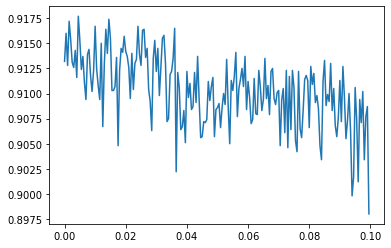

In [72]:
iter = np.arange(0, 0.1, 0.0005)
scores = []
lambda_ = 0
for i in iter:
    lambda_= i
    print('lambda : ', lambda_)
    X = np.hstack((np.ones((np.size(X_train, 0),1)),X_train))
    T = y_train

    K = np.size(T, 1)
    M = np.size(X, 1)
    W = np.zeros((M,K))

    iterations = 50000
    learning_rate = 0.01
    

    initial_cost = compute_cost(X, T, W, lambda_)

    #print("Initial Cost is: {} \n".format(initial_cost[0][0]))

    (cost_history, W_optimal) = batch_gd(X, T, W, learning_rate, iterations, 64, lambda_)

    #print('End iterations')

    ## Accuracy
    X_ = np.hstack((np.ones((np.size(X_validation, 0),1)),X_validation))
    T_ = y_validation
    y_pred = predict(X_, W_optimal)
    score = float(sum(y_pred == np.argmax(T_, axis=1)))/ float(len(y_validation))

    scores.append(score)

plt.plot(iter,scores)
plt.show()